In [1]:
from Process_Data import DataProcessor
import pandas as pd
import numpy as np
import os
from density_plotter import DensityPlotter
from data_integrity_assessor import DataIntegrityAssessor
from data_binner import DataBinner
from typing import Tuple, List, Dict

file_type = "pickle"  # Change as needed: "pickle", "csv", "parquet" #CHOOSE FILE TYPE

def run_processing():
    processor = DataProcessor(
        input_filepath='Data.csv',
        output_filepath=output_filepath,
        report_path='Type_Conversion_Report.csv',
        return_category_mappings=True,
        mapping_directory='Category_Mappings',
        parallel_processing=False,
        date_threshold=0.6,
        numeric_threshold=0.9,
        factor_threshold_ratio=0.2,
        factor_threshold_unique=500,
        dayfirst=True,
        log_level='INFO',
        log_file=None,
        convert_factors_to_int=True,
        date_format=None,  # Keep as None to retain datetime dtype
        save_type=save_type
    )
    processor.process()

if file_type == "pickle":
    save_type = 'pickle'
    output_filepath = 'Processed_Data.pkl'
    run_processing()
    Data = pd.read_pickle('Processed_Data.pkl')
elif file_type == "csv":
    save_type = 'csv'
    output_filepath = 'Processed_Data.csv'
    run_processing()
    Data = pd.read_csv('Processed_Data.csv')  
elif file_type == "parquet":
    save_type = 'parquet'
    output_filepath = 'Processed_Data.parquet'
    run_processing()
    Data = pd.read_parquet('Processed_Data.parquet')



def density_plots(Data, columns):
    # Initialize the DensityPlotter with the classified columns
    plotter = DensityPlotter(
        dataframe=Data,
        category_columns=columns,
        figsize=(25, 10),                     # Adjust figsize as needed
        save_path='Plots/Density_Plots.png',  # Specify path to save the plot or set to None to display
        plot_style='ticks'                # You can choose other styles like 'darkgrid', 'ticks', etc.
    )

    # Generate and save/display the grid of plots
    plotter.plot_grid()

2024-09-21 10:25:04,158 [INFO] Successfully read file: Data.csv
2024-09-21 10:25:04,167 [INFO] Column: Order Number, Type Assessed: string, New Type: object
2024-09-21 10:25:04,168 [INFO] Column: Stay ID, Type Assessed: int, New Type: Int64
2024-09-21 10:25:04,173 [INFO] Column: UMRN, Type Assessed: string, New Type: object
2024-09-21 10:25:04,176 [INFO] Column: DOM, Type Assessed: date, New Type: datetime64[ns]
2024-09-21 10:25:04,177 [INFO] Column: Age at Colln, Type Assessed: float, New Type: float64
2024-09-21 10:25:04,180 [INFO] Column: Collection Time, Type Assessed: date, New Type: datetime64[ns]
2024-09-21 10:25:04,183 [INFO] Column: Order Time, Type Assessed: date, New Type: datetime64[ns]
2024-09-21 10:25:04,186 [INFO] Column: Received Time, Type Assessed: date, New Type: datetime64[ns]
2024-09-21 10:25:04,188 [INFO] Column: Interim Report Time, Type Assessed: date, New Type: datetime64[ns]
2024-09-21 10:25:04,191 [INFO] Column: Preliminary Report Time, Type Assessed: date, N

Column 'Order Number' has unsupported dtype 'object'. Skipping.
Column 'UMRN' has unsupported dtype 'object'. Skipping.
Column 'Clinic ID' has unsupported dtype 'object'. Skipping.
Column 'Clinic Name' has unsupported dtype 'object'. Skipping.
Column 'Isolated Organisms' has unsupported dtype 'object'. Skipping.

🗂️ Binned Columns Categorization:
  Datetime: ['DOM', 'Collection Time', 'Order Time', 'Received Time', 'Interim Report Time', 'Preliminary Report Time', 'Final Report Time']
  Integer: ['Stay ID', 'Test', 'Performing Lab', 'BC scale', 'Clinic Location', 'Region', 'MET yn', 'ED source', 'Lab at source', 'RESULT']
  Float: ['Age at Colln']
  Unsupported: ['Order Number', 'UMRN', 'Clinic ID', 'Clinic Name', 'Isolated Organisms']
Integrity report saved to c:\Users\matth\OneDrive\Desktop\1. DATA SCIENCE MASTER\Capstone_CITS5553\Data_Tests\integrity_loss_report.csv

📄 Integrity Loss Report Saved

📊 Overall Average Integrity Loss: 31.29%


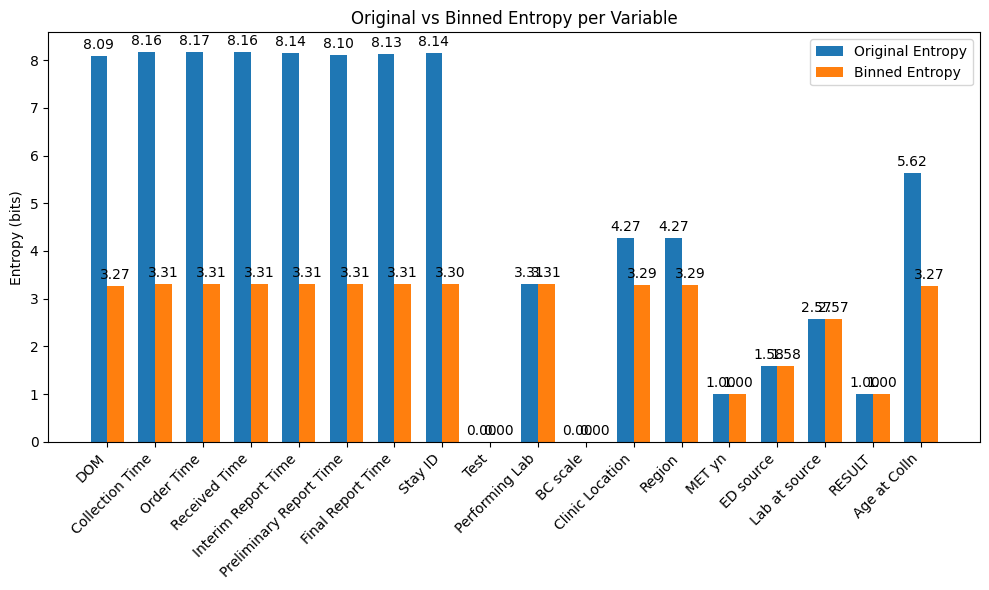

(500, 18) (500, 18)


c:\Users\matth\OneDrive\Desktop\1. DATA SCIENCE MASTER\Capstone_CITS5553\Data_Tests\density_plotter.py:94: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=counts.values, ax=ax, fill=True, color='orange')
c:\Users\matth\OneDrive\Desktop\1. DATA SCIENCE MASTER\Capstone_CITS5553\Data_Tests\density_plotter.py:94: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=counts.values, ax=ax, fill=True, color='orange')


Density plots saved to Plots/Density_Plots.png
Density plots saved to Plots/Density_Plots.png


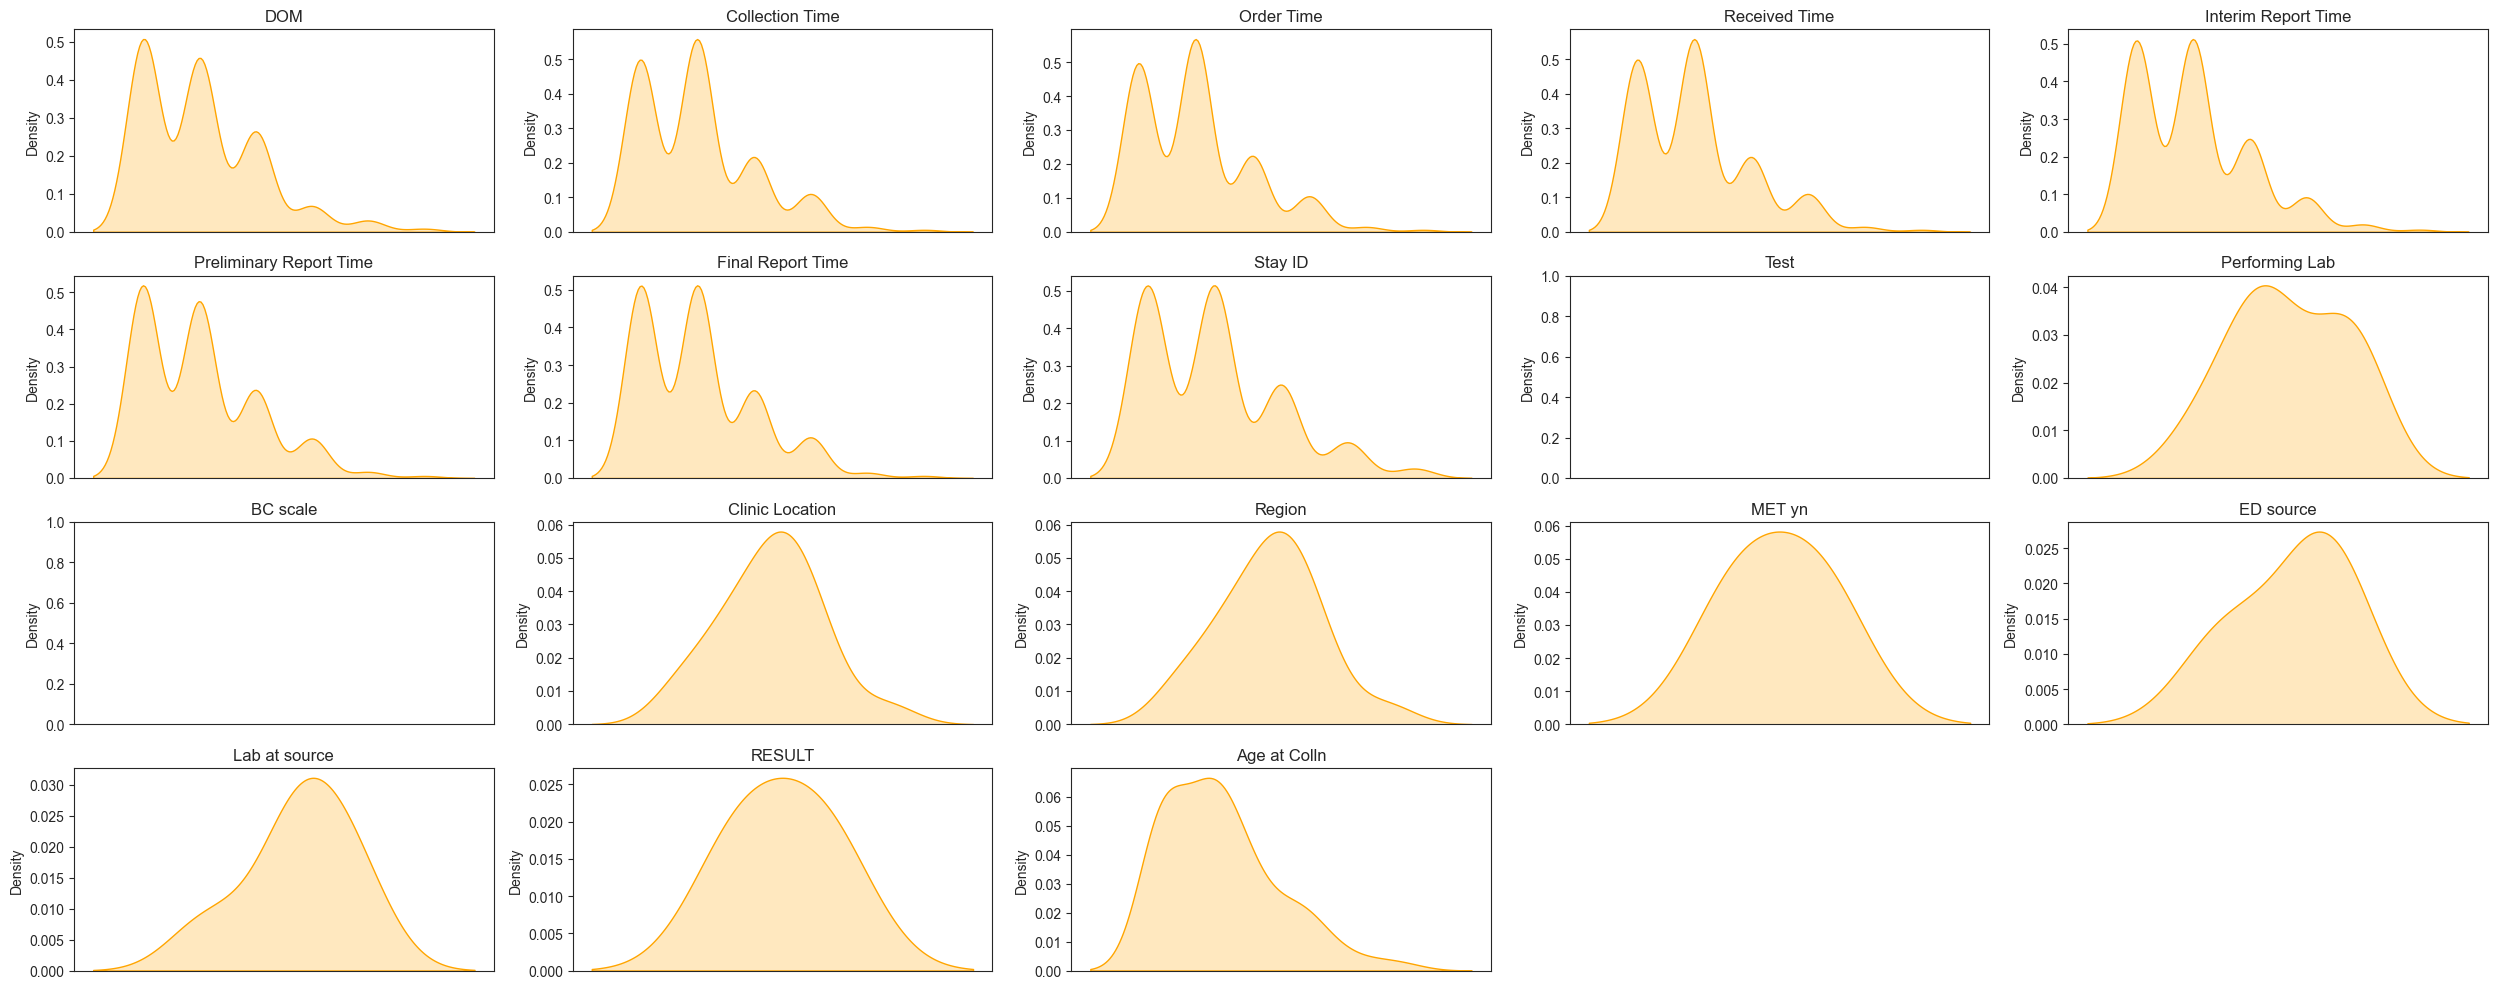

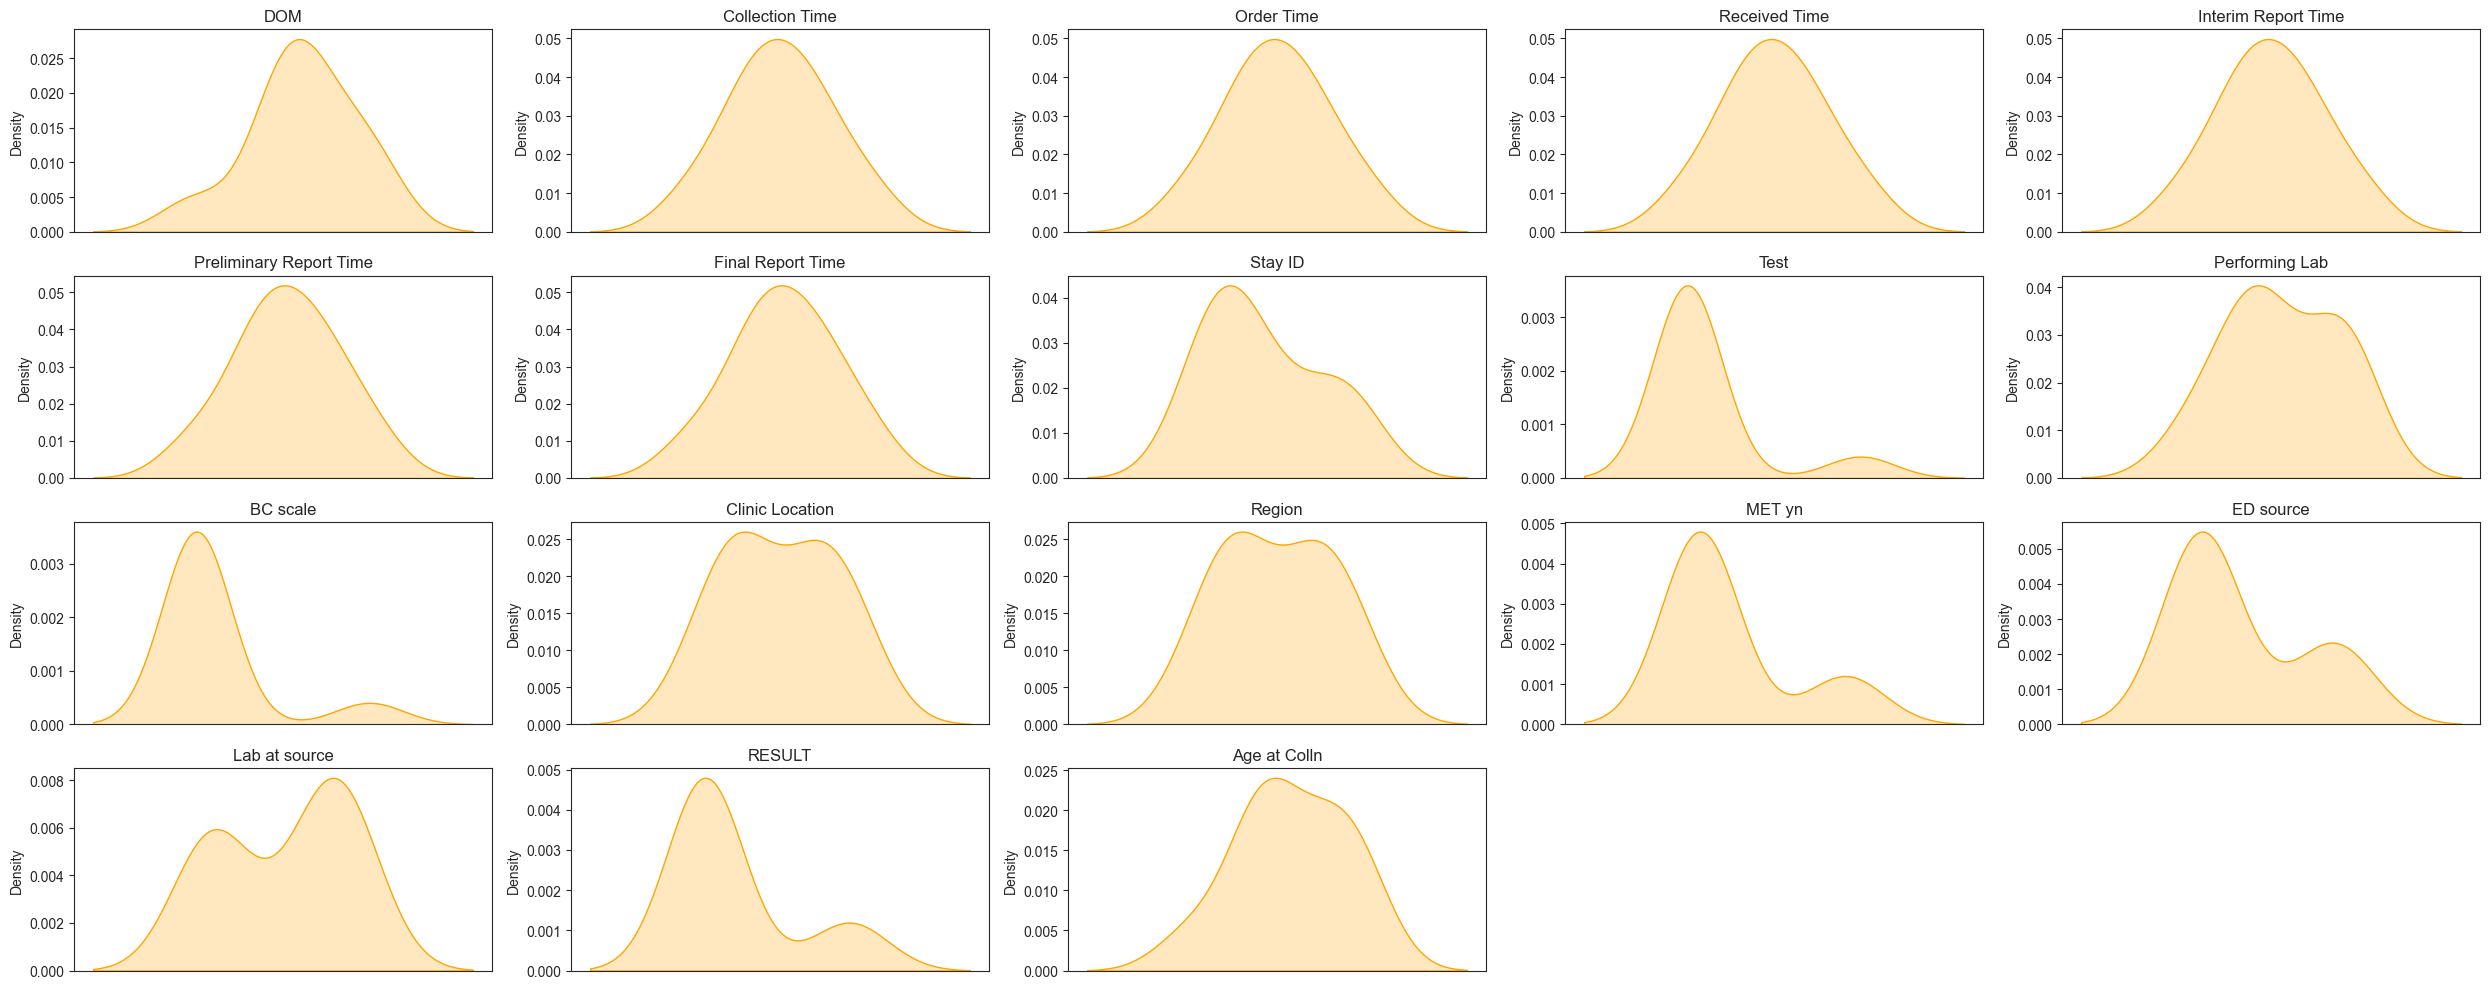

In [2]:
COLUMNS_THAT_CAN_BE_BINNED = Data.select_dtypes(include=['int64', 'int8', 'float64', 'datetime64', 'datetime64[ns]']).columns

# Create Binned DataFrames equal to orginal unique set of values as a reference for full maintenence of data
unique_values = Data[COLUMNS_THAT_CAN_BE_BINNED].nunique()
unique_values_list = unique_values.tolist()
unique_values_dict = dict(zip(COLUMNS_THAT_CAN_BE_BINNED, unique_values_list))

binner = DataBinner(Data)

ORIGINAL_DATA, ORIGINAL_DATA_COLUMNS = binner.bin_columns(unique_values_dict)

#create dictionary from the binnable columns as keys and the number of bins as values
bins = {col: 10 for col in Data.columns} #INTERACTIVE: Change the number of bins as needed
binned_df, binned_columns = binner.bin_columns(bins)

print("\n🗂️ Binned Columns Categorization:")
for dtype, cols in binned_columns.items():
    print(f"  {dtype.capitalize()}: {cols}")

assessor = DataIntegrityAssessor(original_df=ORIGINAL_DATA, binned_df=binned_df)
assessor.assess_integrity_loss()

# Generate and print the report
report = assessor.generate_report()
assessor.save_report('integrity_loss_report.csv')
print("\n📄 Integrity Loss Report Saved")

# Print overall average integrity loss
overall_loss = assessor.get_overall_loss()
print(f"\n📊 Overall Average Integrity Loss: {overall_loss:.2f}%")
# (Optional) Plot the entropy comparison
assessor.plot_entropy()


print(ORIGINAL_DATA.shape, binned_df.shape)

# Density plots for the original and binned data
density_plots(ORIGINAL_DATA, ORIGINAL_DATA.columns)
density_plots(binned_df, binned_df.columns)

In [3]:
Data.head()

,Order Number,Stay ID,UMRN,DOM,Age at Colln,Collection Time,Order Time,Received Time,Interim Report Time,Preliminary Report Time,...,Performing Lab,BC scale,Clinic Location,Region,MET yn,Clinic Name,ED source,Lab at source,Isolated Organisms,RESULT
0,O513653999,66448162,U1679215,1975-04-23,46.967830,2022-04-11 14:31:00,2022-04-11 13:16:00,2022-04-11 15:12:00,2022-04-11 19:12:00,2022-04-11 22:12:00,...,7,0,18,18,1,West Midlands Oncology,2,1,nan,0
1,O606959381,85136920,U2689485,1936-06-08,85.941136,2022-05-18 10:39:00,2022-05-18 09:34:00,2022-05-18 11:09:00,2022-05-18 16:09:00,2022-05-18 18:09:00,...,3,0,6,6,0,London Oncology,2,1,Gram-negative-bacillus & Staphylococcus epider...,1
2,O253002188,82878878,U8515682,1965-02-19,56.960986,2022-02-05 10:31:00,2022-02-05 10:11:00,2022-02-05 11:01:00,2022-02-05 16:01:00,2022-02-05 20:01:00,...,5,0,8,8,0,North East Oncology,2,2,a possible Staphylococcus complex & Gram-posit...,1
3,O611671263,19272465,U2507002,1933-10-13,88.939083,2022-09-21 15:55:00,2022-09-21 14:09:00,2022-09-21 16:13:00,2022-09-21 18:13:00,2022-09-21 19:13:00,...,7,0,9,9,0,NWH Oncology,2,0,nan,0
4,O757970849,25481980,U9161179,1988-08-25,33.976728,2022-08-17 01:25:00,2022-08-16 23:55:00,2022-08-17 01:56:00,2022-08-17 03:56:00,2022-08-17 05:56:00,...,3,0,7,7,1,Midlands ED,1,-1,Staphylococcus hominis complex,1


In [4]:
# # example_usage.py

# import pandas as pd
# from grid_density_plotter import GridDensityPlotter


# # Suppose 'Test' is a factor column
# factor_columns = ['Test']

# # Initialize the GridDensityPlotter
# plotter = GridDensityPlotter(
#     dataframe=Data,
#     factor_columns=factor_columns,
#     figsize=(20, 15),
#     save_path=None,  # Set to a file path like 'density_plots.png' to save
#     plot_style='whitegrid'
# )

# # Generate and display the grid of density plots
# plotter.plot_grid(plot_kind='kde')  # You can choose 'kde' or 'hist'